# Text Analysis

Text analysis, also known as text mining or natural language processing (NLP), is the process of extracting meaningful insights, patterns, and information from unstructured text data. It involves various techniques such as text preprocessing, sentiment analysis, named entity recognition, topic modelling, and text classification.

In [5]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [28]:
! pip install spacy


In [29]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation



In [30]:
text=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\articles.csv',encoding='latin-1')
text

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning
5,You must have seen the news divided into categ...,News Classification with Machine Learning
6,Natural language processing or NLP is a subfie...,Best Books to Learn NLP
7,By using a third-party application or API to m...,Send Instagram Messages using Python
8,Twitter is one of the most popular social medi...,Pfizer Vaccine Sentiment Analysis using Python
9,The squid game is currently one of the most tr...,Squid Game Sentiment Analysis using Python


In [31]:
#display the first few rows of the dataset
text.head()

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning


In [32]:
#check for null values
text.isnull().sum()

Article    0
Title      0
dtype: int64

##### move forward by visualizing the word cloud of the titles

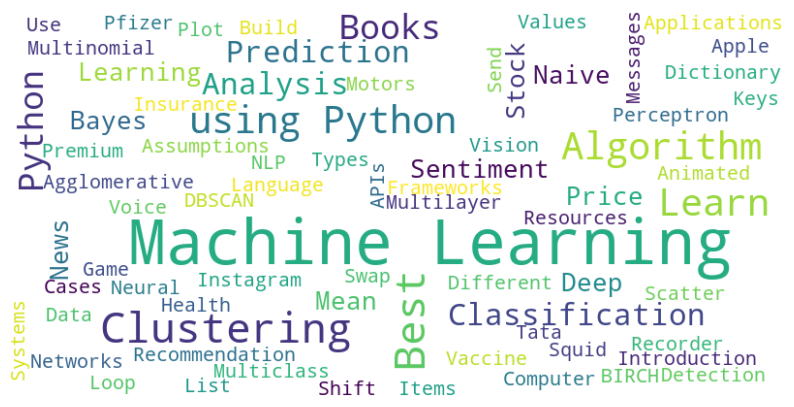

In [33]:
titles = text['Title']

all_titles = ' '.join(titles)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### sentiment distribution

In [34]:
text['Sentiment'] = text['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Distribution
fig = px.histogram(text, x='Sentiment', title='Sentiment Distribution')
fig.show()

now calculates the sentiment polarity of each article using TextBlob, creates a histogram to visualize the distribution of sentiments in your data, and then displays the histogram using Plotly. 

 The sentiment polarity indicates the sentiment of the text on a scale from -1 to 1, where -1 represents a negative sentiment, 0 represents a neutral sentiment, and 1 represents a positive sentiment.

In [41]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(text['Article'])

lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

lda_topic_matrix = lda_model.fit_transform(tf)


topic_names = ["Topic " + str(i) for i in range(lda_model.n_components)]

text['Dominant_Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)]

fig = px.bar(text['Dominant_Topic'].value_counts().reset_index(), x='index', y='Dominant_Topic', title='Topic Distribution')
fig.show()

Topics are 5 types topic0,topic1,topic2,topic3,topic4.

 visualize the distribution of dominant topics across the articles. The number of articles associated with each dominant topic is plotted on the y-axis, and the dominant topics are plotted on the x-axis.